In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import grid_data

## Basic basin mask

In [7]:
%%time
ds = grid_data.open_mask_dataset(clobber=False)
ds

CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 2.44 ms


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    area       (lat, lon) float64 ...
    mask       (lat, lon) float64 ...
    kmt        (lat, lon) int64 ...
    mask_orig  (lat, lon) int64 ...

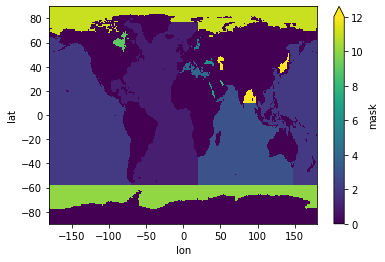

In [8]:
fig = plt.figure()
ds.mask.plot(vmin=0, vmax=12)

## Show product basin masks

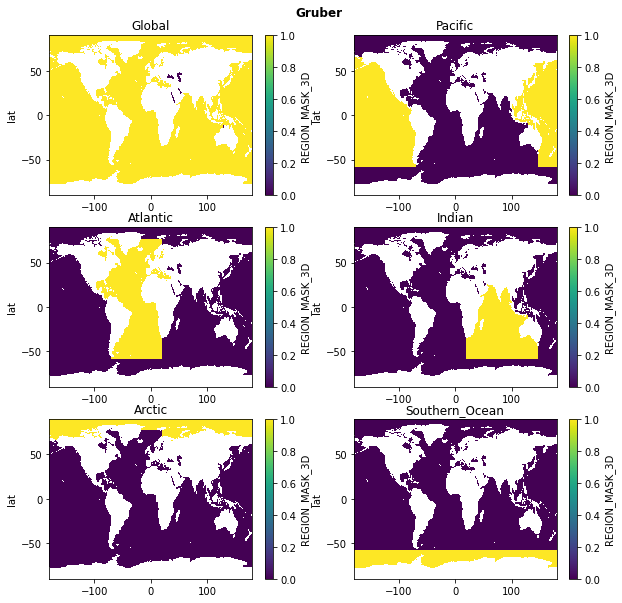

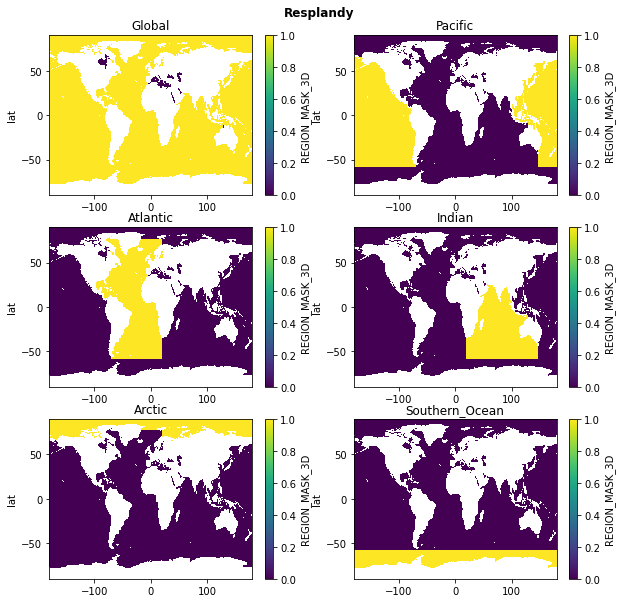

In [9]:
for product in ["Gruber", "Resplandy"]:
    basin = grid_data._get_basin_aggregation(product)
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(basin.region)):
        ax = fig.add_subplot(3,2,i+1)
        basin.REGION_MASK_3D[i,:,:].plot(axes=ax)
        ax.set_title(basin.region.values[i])
        ax.set_xlabel("")
    fig.suptitle(product, fontweight="bold", y=0.92)

## Inversion regions

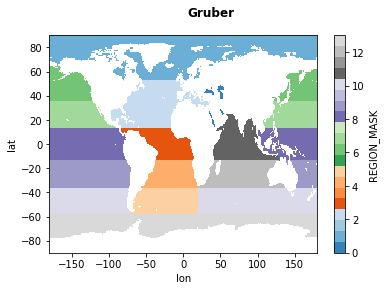

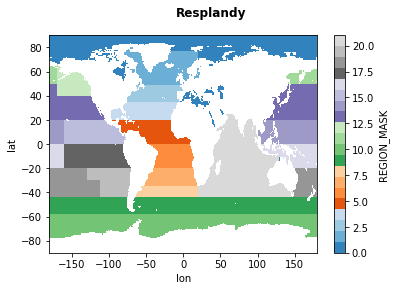

In [10]:
for product in ["Gruber", "Resplandy"]:
    fig = plt.figure()
    ds = grid_data._get_inversion_regions(product)
    ds.REGION_MASK.plot(cmap='tab20c')
    fig.suptitle(product, fontweight="bold")